In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px

In [179]:
data = pd.read_csv('data.csv')
data.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [181]:
data.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 12
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000,50418.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139,15.442097
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902,2.495039
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000,6.695799
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000,14.151619
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000,15.929201
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000,17.187513
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000,21.087439


In [182]:
data.shape

(50418, 14)

## Null Values
Checking Null Values

In [183]:
data.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64

<Axes: >

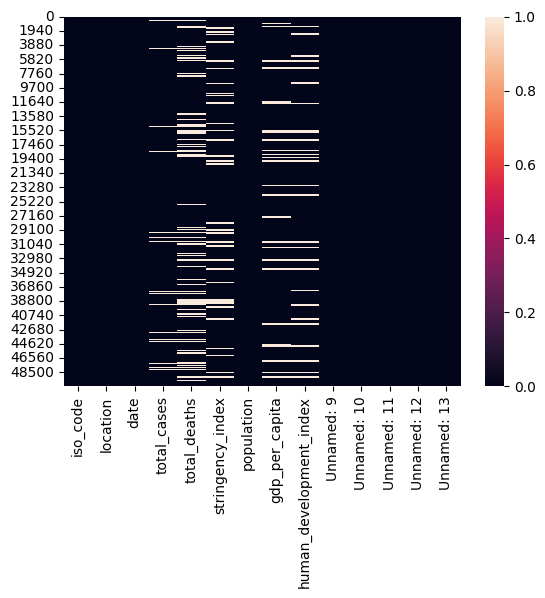

In [184]:
sns.heatmap(data.isnull())

Dropping Null Values

In [185]:
print("With Null Values : ", data.shape)
data = data.dropna()

With Null Values :  (50418, 14)


In [186]:
print("Without Null Values : ", data.shape)

Without Null Values :  (31518, 14)


<Axes: >

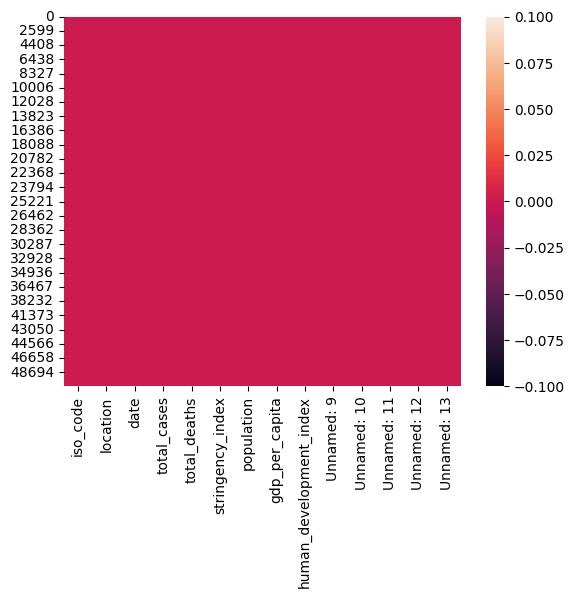

In [187]:
sns.heatmap(data.isnull())

Shortening the data for proper Exploratory Data Analysis Report with Visualization

In [188]:
data = data.iloc[0:7000,:]

## Duplicate Values

Dropping Duplicate Values

In [189]:
# data = data.drop_duplicates()

In [190]:
# data.shape

## Outliers

Checking Outliers

[Text(0, 0, 'total_cases'),
 Text(1, 0, 'total_deaths'),
 Text(2, 0, 'stringency_index'),
 Text(3, 0, 'population'),
 Text(4, 0, 'gdp_per_capita'),
 Text(5, 0, 'human_development_index'),
 Text(6, 0, 'Unnamed: 12')]

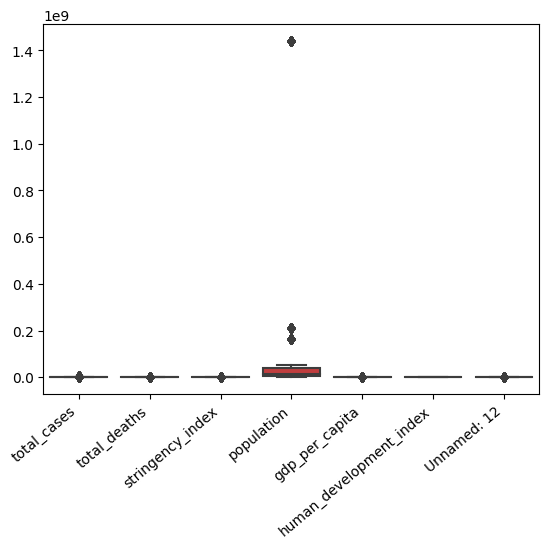

In [191]:
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'right')


<Axes: xlabel='population'>

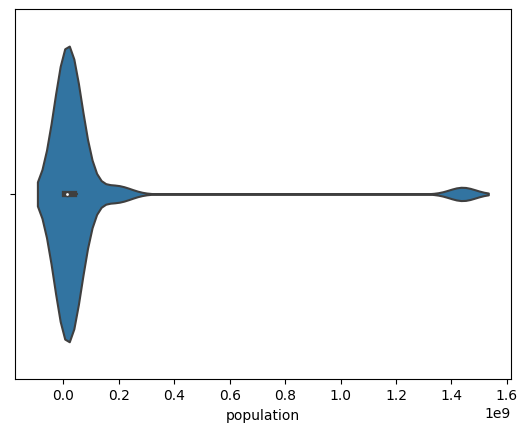

In [192]:
sns.violinplot(data=data,x = 'population')


Solving Outliers

In [193]:
# Quantiles : 
Q1 = data['population'].quantile(0.25)
Q3 = data['population'].quantile(0.75)
IQR = Q3 - Q1
print("Quantile 1 : ", Q1)
print("Quantile 3 : ", Q3)
print("IQR : ", IQR)

# Upper Quantile :
upper = Q3+1.5*IQR
print("Upper Quantile : ",upper)
# Lower Quantile : 
lower = Q1-1.5*IQR
print("Lower Quantile : ",lower)


Quantile 1 :  4829764.0
Quantile 3 :  37742157.0
IQR :  32912393.0
Upper Quantile :  87110746.5
Lower Quantile :  -44538825.5


In [194]:
upper_arr = np.where(data['population']>upper)[0]
lower_arr = np.where(data['population']<lower)[0]

print("Before Removing Outliers : ", data.shape)
# data = data.drop(index=upper_arr)
data = data.drop(index=lower_arr)
print("After Removing Outliers : ", data.shape )

Before Removing Outliers :  (7000, 14)
After Removing Outliers :  (7000, 14)


No Impact of Outliers Found

## Skewness


In [195]:
skewness = data['population'].skew()
print(skewness)

4.614490840276978


C:\Users\Hunain\AppData\Local\Temp\ipykernel_12352\3399190770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['population'],color='g')


<Axes: xlabel='population', ylabel='Density'>

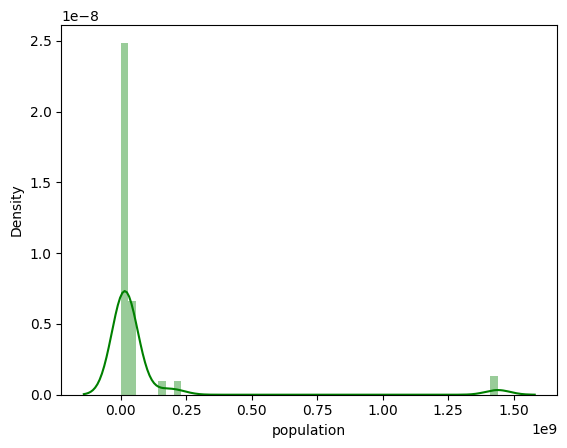

In [196]:
sns.distplot(data['population'],color='g')

Normalize the Distribution

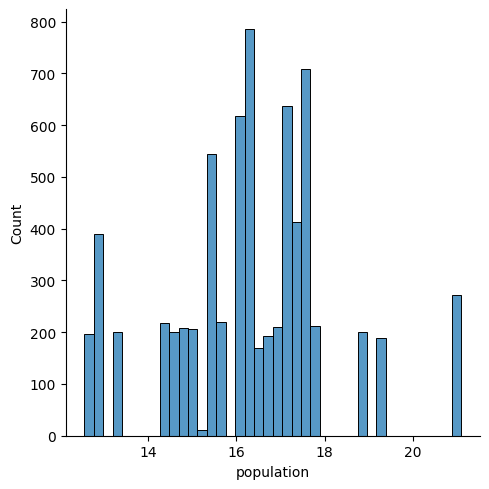

In [197]:
log_y = np.log1p(data['population'])
sns.displot(log_y)


In [198]:
log_y.skew()

0.13195669059368823

Log1p Second time to Again and further normalize the distribution

In [199]:
log_y2 = np.log1p(log_y)
log_y2.skew()

-0.25273868600002475

In [200]:
log_y3 = np.log1p(log_y)
log_y3.skew()
# Same Skewness as upper shows that it is skewed till its last.

-0.25273868600002475

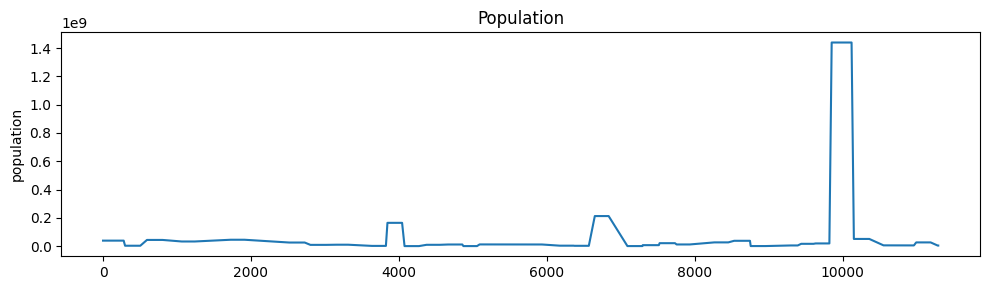

In [201]:
plt.figure(figsize=(10, 3))
data['population'].plot()
plt.ylabel('population')
plt.xlabel(None)
plt.title("Population")
plt.tight_layout()

to get years only

In [210]:
data['date'] = pd.to_datetime(data['date'])
data['Year'] = data['date'].dt.year

In [211]:
data.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Year
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494,2019
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494,2020
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494,2020
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494,2020
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494,2020


C:\Users\Hunain\AppData\Local\Temp\ipykernel_12352\462942659.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  aax.set_xticklabels(aax.get_xticklabels(),rotation = 90, ha = 'right')


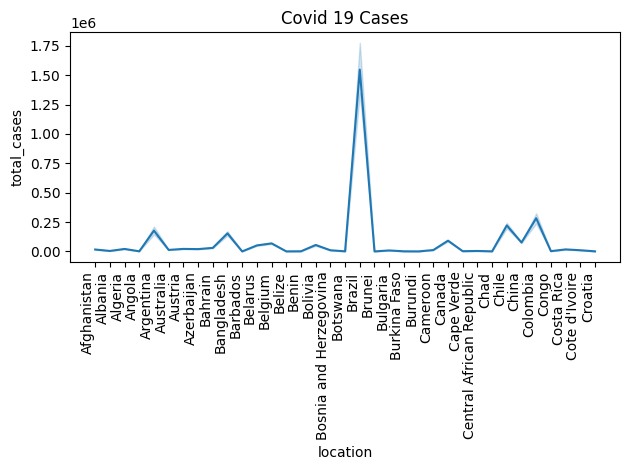

In [203]:
aax = sns.lineplot(data = data, x = 'location', y = 'total_cases')
aax.set_xticklabels(aax.get_xticklabels(),rotation = 90, ha = 'right')
plt.title('Covid 19 Cases')
plt.tight_layout()

C:\Users\Hunain\AppData\Local\Temp\ipykernel_12352\4208503907.py:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



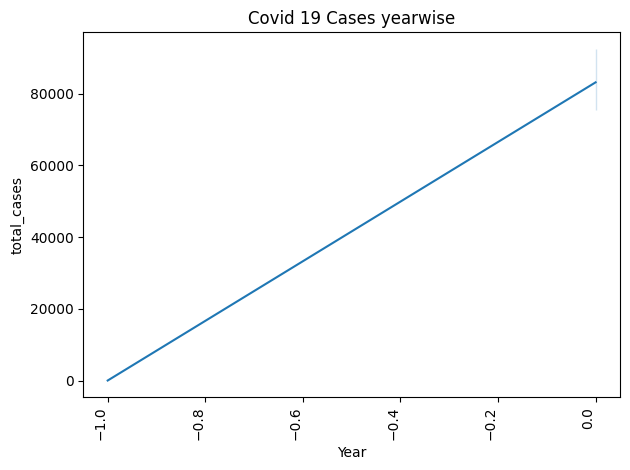

In [218]:
aax = sns.lineplot(data = data, x = 'Year', y = 'total_cases')
aax.set_xticklabels(aax.get_xticklabels(),rotation = 90, ha = 'right')
plt.title('Covid 19 Cases yearwise')
plt.tight_layout()

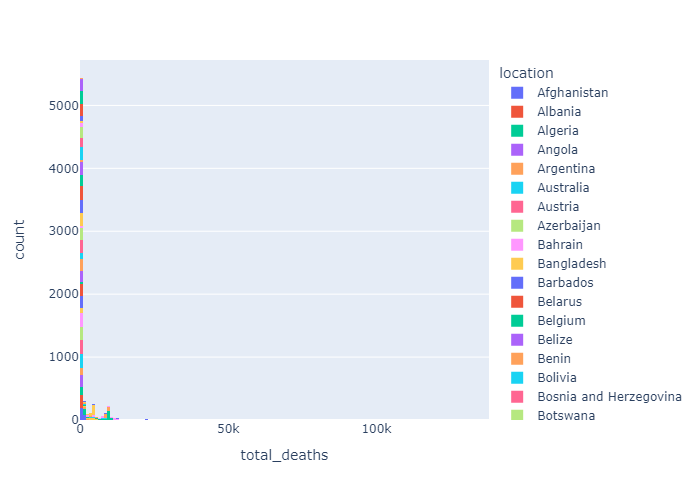

In [237]:
fig = px.histogram(data, x="total_deaths", color="location")
fig.show('png')

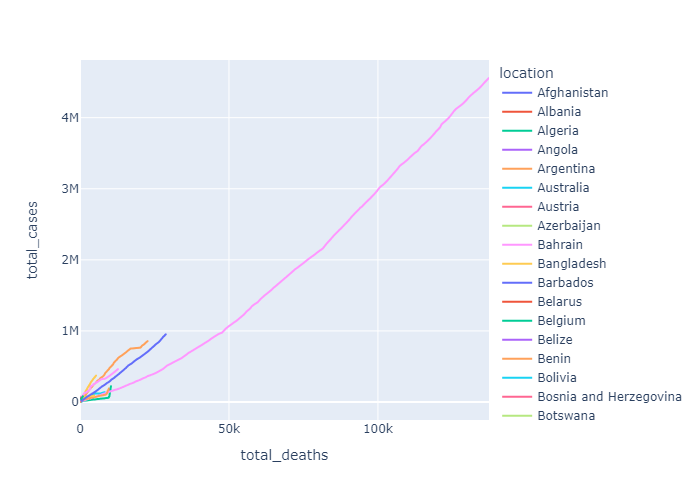

In [238]:
fig = px.line(data, x="total_deaths", y="total_cases", color='location')
fig.show('png')

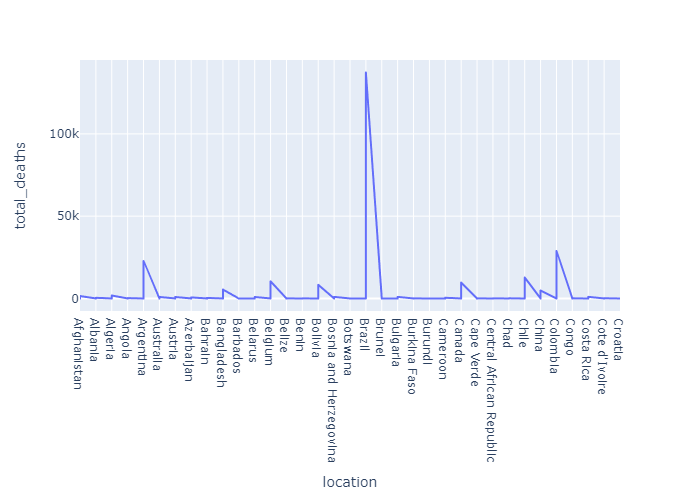

In [251]:
fig = px.line(data, x='location', y="total_deaths")
fig.show('png')

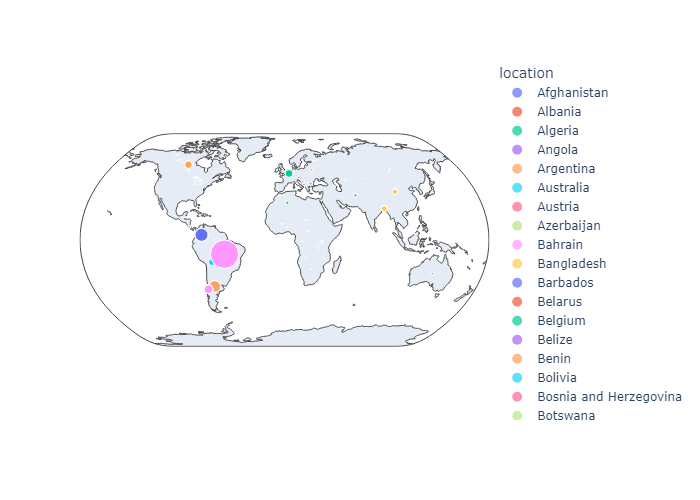

In [252]:
fig = px.scatter_geo(data, locations="iso_code", color="location",
                     size="total_deaths",hover_name='total_cases',
                     projection="natural earth")
fig.show('png')